## 가설검정 연습문제 (2)

### 필요한 패키지 설치

In [1]:
from pandas import read_excel
from scipy import stats
import seaborn as sb
from matplotlib import pyplot as plt

## 문제1

어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.

각 원료에서 주성분 A의 함량은 다음과 같다. 단, 함량은 정규분포를 따른다고 가정한다.

이 두 원료의 주성분 A의 함량이 다른지를 분석하라. => 두 원료의 비교(=독립Ttest)

### 데이터 불러오기

In [2]:
df1 = read_excel("https://data.hossam.kr/E02/material.xlsx")
df1

,상표1,상표2
0,80.4,80.1
1,78.2,81.2
2,80.1,79.5
3,77.1,78.0
4,79.6,76.1
5,80.4,77.0
6,81.6,80.1
7,79.9,79.9
8,84.4,78.8
9,80.9,80.8


In [3]:
# 두 그룹의 분산 확인 
vars1 = df1['상표1'].var()
vars2 = df1['상표2'].var()
vars1, vars2

(4.153636363636368, 2.7538888888888917)

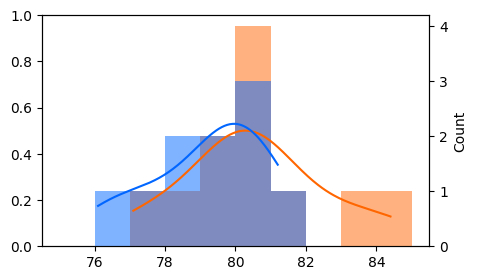

In [4]:
# 커널 밀도 그래프 => 두 그룹은 공통분산O
bins = [75,76,77,78,79,80,81,82,83,84,85,85]
fig, ax1 = plt.subplots(1,1,figsize = (5,3))
ax2 = ax1.twinx()
sb.histplot(data=df1, x='상표1', bins=bins, kde=True, ax=ax2, color='#ff6600')
sb.histplot(data=df1, x='상표2', bins=bins, kde=True, ax=ax2, color='#0066ff')
plt.show()
plt.close()

### 가설설정

|가설|내용|식|
|----|---|---|
|귀무가설|상표1과 상표2의 주성분 함량에는 차이가 없다.|$H_0 : \mu_1 = \mu_2$|
|대립가설|상표1과 상표2의 주성분 함량에는 차이가 있다.|$H_1 : \mu_1 \neq \mu_2$|

In [ ]:
# 결측치 제거
df1.dropna(inplace=True)
df1

In [7]:
stats.ttest_ind(df1['상표1'], df1['상표2'], equal_var = True, alternative = 'two-sided')

TtestResult(statistic=1.3710671216714043, pvalue=0.18720759661580608, df=18.0)

- 결과 해석 : <br>
- 나 : 상표1과 상표2는 공통분산에 속해있다. 즉, 주성분A함량에 대한 데이터 분포가 일치하다고 볼 수 있기 때문에 두 그룹의 함량 차이는 없다. <br>
- 쌤 : 검정통계량 1.3710에서 p-value가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉, 상표1과 상표2의 함유량에는 차이가 없다. <br>

*************

## 문제2

특정 피임약이 사용자의 혈압을 저하시키는지 조사하고자 한다.

이를 위해 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록했다.

얻어진 데이터는 다음과 같다. 피임약 복용이 혈압에 영향을 주는지 분석하라. => before, after : 대응표본 T-test

### 데이터 불러오기

In [4]:
df2 = read_excel("https://data.hossam.kr/E02/blood_pressure.xlsx")
df2

,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


> 가정 : 피임약의 복용전과 복용후의 혈압은 차이가 있다.

|가설|내용|
|---|----|
|귀무가설| 복용전과 복용후의 혈압은 차이가 없다.|
|대립가설| 복용전과 복용후의 혈압은 차이가 있다.|

In [17]:
stats.ttest_rel(df2['복용전'], df2['복용후'], alternative = 'two-sided')

TtestResult(statistic=3.105360487466109, pvalue=0.007749436106654119, df=14)

- 결과해석:
- 차이값에 대한 t 통계량의 값이 3.1, 대응되는 유의확률이 0.0077로 0.05보다 작으므로(귀무가설 기각) 유의수준 0.05에서 복용전의 혈압과 복용후의 혈압에 차이가 있다. 피임약 복용은 혈압에 영향을 준다고 할 수 있다.

********************

## 문제3

고등학교 육상선수에게 체중감량을 시키면 달리기에 어떤 변화가 일어나는지 조사하기 위 하여, 어떤 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시하여 다음의 데이터를 얻었다.

감량 전과 후에 달리기 속도에 차이가 있는지 분석하라. => before, after : 대응표본 Ttest

#### 데이터 불러오기

In [ ]:
df3 = read_excel("https://data.hossam.kr/E02/runner_diet.xlsx")
df3

In [11]:
df3.dropna(axis=1, inplace=True)
df3

,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


> 가정 : 감량전과 감량후의 달리기 속도에 차이가 있다.

|가설|내용|
|---|----|
|귀무가설| 감량전과 감량후의 달리기 속도에 차이가 없다.|
|대립가설| 감량전과 감량후의 달리기 속도에 차이가 있다.|

In [19]:
stats.ttest_rel(df3['감량전'],df3['감량후'], alternative='two-sided')

TtestResult(statistic=2.375306807446375, pvalue=0.04154604923393679, df=9)

- 결과 해석: 
- 차이값에 대한 t 통계량의 값이 2.38, 대응되는 유의확률이 0.04로 0.05보다 작으므로(귀무가설 기각) 유의수준 0.05에서 감량훈련전과 감량훈련후의 달리기 속도에 차이가 있다. 즉, 체중을 감량하는 것은 달리기 속도에 영향을 준다.

********************

## 문제4

고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 다음의 체력 데이터를 얻었다.

감량 전과 감량 후 간에 차이가 있는가의 대응비교를 악력(우), 윗몸일으키기, 턱걸이에 대하여 실시하고 분석하라.

#### 데이터 불러오기

In [13]:
df4 = read_excel("https://data.hossam.kr/E02/wrestler_diet.xlsx")
df4

,이름,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
0,B.S,43,41,35,41,25,29
1,P.J,42,41,40,44,25,29
2,G.G,52,50,36,41,22,23
3,A.L,53,52,38,42,10,15
4,I.H,44,40,36,42,15,19
5,B.Y,46,47,39,44,17,19
6,I.K,48,47,35,42,24,26
7,K.B,58,55,34,36,17,18
8,K.J,50,50,33,35,17,20
9,S.S,48,50,39,45,21,25


> 가정 : 감량전의 악력은 감량후의 악력와 차이가 있다.

|가설|내용|
|---|----|
|귀무가설| 감량전의 악력은 감량후의 악력와 차이가 없다.|
|대립가설| 감량전의 악력은 감량후의 악력와 차이가 있다.|

In [20]:
stats.ttest_rel(df4['감량전 악력'], df4['감량후 악력'], alternative = 'two-sided')

TtestResult(statistic=2.3654081485744824, pvalue=0.037454446305019644, df=11)

- 결과해석 :
- 차이값에 대한 t검정통계량은 2.37 대응되는 유의확률은 0.04로 유의수준0.05보다 작으므로 (귀무가설기각) 감량전의 악력과 감량후의 악력에 차이가 있다. 체중감량은 악력에 영향을 준다.

> 가정 : 감량전의 윗몸일으키기는 감량후의 윗몸일으키기와 차이가 있다.

|가설|내용|
|---|----|
|귀무가설| 감량전의 윗몸일으키기는 감량후의 윗몸일으키기와 차이가 없다.|
|대립가설| 감량전의 윗몸일으키기는 감량후의 윗몸일으키기와 차이가 있다.|

In [21]:
stats.ttest_rel(df4['감량전 윗몸일으키기'], df4['감량후 윗몸일으키기'], alternative = 'two-sided')

TtestResult(statistic=-7.179926973956724, pvalue=1.798236117030195e-05, df=11)

- 결과해석:
- 차이값에 대한 t검정통계량은 7.1 대응되는 유의확률은 -1.79로 유의수준 0.05보다 작으므로 귀무가설기각. 감량전의 윗몸일으키기는 감량전의 윗몸일으키기와 차이가 있다. 체중감량은 윗몸일으키기에 영향을 준다.

> 가정 : 감량전의 턱걸이는 감량후의 턱걸이와 차이가 있다.

|가설|내용|
|---|----|
|귀무가설| 감량전의 턱걸이는 감량후의 턱걸이와 차이가 없다.|
|대립가설| 감량전의 턱걸이는 감량후의 턱걸이와 차이가 있다.|

In [22]:
stats.ttest_rel(df4['감량전 턱걸이'], df4['감량후 턱걸이'], alternative = 'two-sided')

TtestResult(statistic=-6.841977654731714, pvalue=2.7937021187235204e-05, df=11)

- 결과해석:
- 차이값에 대한 t검정통계량은 6.8 대응되는 유의확률은 -2.79로 유의수준 0.05보다 작으므로 귀무가설기각. 감량전의 턱걸이는 감량전의 턱걸이와 차이가 있다. 체중감량은 턱걸이에 영향을 준다.

#### 반복문으로 풀기

In [14]:
df4 = df4.set_index('이름')
cols = df4.columns
cols

Index(['감량전 악력', '감량후 악력', '감량전 윗몸일으키기', '감량후 윗몸일으키기', '감량전 턱걸이', '감량후 턱걸이'], dtype='object')

In [16]:
n = len(cols)
n

6

In [24]:
for i  in range(0,n,2):
    print(i, i+1)
    result = stats.ttest_rel(df4[df4.columns[i]], df4[df4.columns[i+1]], alternative = 'two-sided')
    print(result)

0 1
TtestResult(statistic=2.3654081485744824, pvalue=0.037454446305019644, df=11)
2 3
TtestResult(statistic=-7.179926973956724, pvalue=1.798236117030195e-05, df=11)
4 5
TtestResult(statistic=-6.841977654731714, pvalue=2.7937021187235204e-05, df=11)
